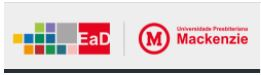

ASSOCIAÇÃO E REGRESSÃO

Profa. Msc.Vanusa da Silva Santana 

TURMA 01A – MATRÍCULA 92104843
Fernando Antonio Carvalho Pessoa

Tarefa da trilha 2: praticar a implementação da regressão linear utilizando o sklearn

#Amostra de teste


## Descrição
amostra de dados com a idade de 7 homens e sua respectiva pressão sistólica.

## Atributos


As colunas neste conjunto de dados são:

Idade, X

Pressão sistólica, y

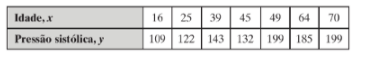

# Criação da amostra

In [ ]:
## Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# criação da 
idade = [16, 25, 39, 45, 49, 64 ,70]
pressao = [109, 122, 143, 132, 199, 185, 199]
df = pd.DataFrame(list(zip(idade,pressao)), columns = ['Idade','Pressao'])
df.shape, df.head(10), df.describe()

((7, 2),    Idade  Pressao
 0     16      109
 1     25      122
 2     39      143
 3     45      132
 4     49      199
 5     64      185
 6     70      199,            Idade     Pressao
 count   7.000000    7.000000
 mean   44.000000  155.571429
 std    19.459359   37.964269
 min    16.000000  109.000000
 25%    32.000000  127.000000
 50%    45.000000  143.000000
 75%    56.500000  192.000000
 max    70.000000  199.000000)

# 1.	Faça um gráfico de dispersão dos dados.

##Grafico de dispersão dos dados

'Correlação : 0.883'

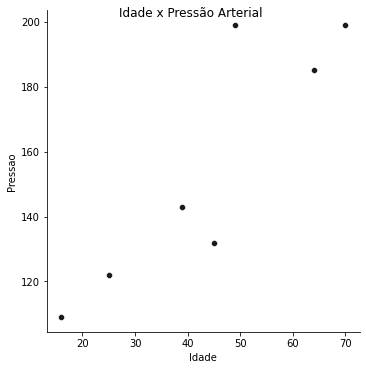

In [ ]:
disp = sns.relplot(x="Idade", y="Pressao", data=df, color=".1");
disp.fig.suptitle('Idade x Pressão Arterial');
corr = ((pearsonr(df['Idade'], df['Pressao']))[0])
corrp = 'Correlação : ' + str(round(corr,3) )
corrp

#2.	Quais foram suas observações? Há correlação entre os dados?#

Embora tenhamos conhecimento de que a relação de pressão arterial esta associada mais a questões como o IMC, a obesidade e sedentarismo do que a idade, percebemos uma relação linear positiva de 0,883.
Temos no entanto dois pontos fora dessa reta, a idade de 45 anos , que pode sugerir uma pessoa com hábitos mais saudáveis e a pessoa de 49 que indica algum problema mais grave de saúde.


#3.	Obtenha a Inclinação e o Intercepto, e a equação da reta de regressão.

In [ ]:
# extração dos atributos dos rótulos
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
X, y

(array([[16],
        [25],
        [39],
        [45],
        [49],
        [64],
        [70]]), array([109, 122, 143, 132, 199, 185, 199]))

In [ ]:
 #criação do conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Treinando o algoritmo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Intercepto e Inclinação
round(regressor.intercept_,2), regressor.coef_

(79.76, array([1.7496628]))

In [ ]:
#Equação da reta
Y = regressor.intercept_ + (regressor.coef_ * 61)
Y

array([186.49285136])

#4.	Faça a avaliação da qualidade do modelo de regressão linear.

In [ ]:
#Comparação com base de teste
y_pred = regressor.predict(X_test)
dfT = pd.DataFrame({'Esperado': y_test, 'Previsto': y_pred})
dfT

,Esperado,Previsto
0,199,202.239817
1,143,148.000270


In [ ]:
#Avaliação do modelo
print('MAE - erro médio absoluto         : ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE - erro médio quadrático       : ',metrics.mean_squared_error(y_test, y_pred))
print('RMSE - raiz quadrada média do erro: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# O R² mede quanto do erro de previsão é eliminado
print('R2 -                              : ',metrics.r2_score(y_test, y_pred))

MAE - erro médio absoluto         :  4.12004316158621
MSE - erro quadrático médio       :  17.749554517736463
RMSE - raiz quadrada média do erro:  4.213022017238512
R2 -                              :  0.9773602620947239
